# Praktikum Informationstechnik im Maschinenbau II
## P07 - Erkennung von Tönen und Akkorden mit thinkdsp


## Aufgabenstellung:
Generieren Sie mithilfe des thinkdsp Moduls ein Python-Programm, um Töne zu erkennen und Dreiklänge (mehrere Töne) zu erkennen.
Die Frequenzen und die zugehörigen Töne sind in dictionaries zusammengefasst.
Wave Dateien mit unterschiedlichen Inhalten müssen geladen, dargestellt und - wenn gewünscht - angehört werden.
Die zu klassifizierenden Wave Dateien enthalten einzelne Töne, aber auch mehrere Töne, die Identifiziert werden sollen.
Die Töne wurden mit einer Gitarre erzeugt, so dass ein paar spezifische Randbedingungen (Obertöne) berücksichtigt werden müssen.

### 1. Notwendige Packages und Module importieren

In [9]:
import thinkdsp
import thinkplot
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

### 2. Dictionaries
Das Dictionary `tones` verbindet die einzelnen Töne auf einer Standardgitarre mit den Frequenzen.
E2 entspricht also 82.4 Hz und E3, eine Oktave höher, hat die Frequenz 164.81 Hz.
Man braucht die sog. Obertöne, da eine einzelne Gitarrensaite nicht nur in einer Frequenz schwingt, sondern auch
Obertöne generiert, also alles im Bereich "E".

In [84]:
notes = {
    'B4':493.883,'Bb4':466.164,'A4':440,'G#4':415.305,'G4':391.995,'F#4':369.994,'F4':349.228,'E4':329.628,'D#4':311.127,'D4':293.665,
    'C#4':277.183,'C4':261.626,'B3':246.942,'Bb3':233.082,'A3':220,'G#3':207.652,'G3':195.998,'F#3':184.997,'F3':174.614,'E3':164.814,
    'D#3':155.563,'D3':146.832,'C#3':138.591,'C3':130.813,'B2':123.471,'Bb2':116.541,'A2':110,'G#2':103.826,'G2':97.9989,'F#2':92.4986,
    'F2':87.3071,'E2':82.4069
}

Das Dictionary `harmonics` wird später für die Identifikation der Dreiklänge benutzt.
Hier sind einfache Dur-Dreiklänge aufgelistet, die auf der Gitarre gespielt werden und identifiziert werden sollen.

In [3]:
harmonics = {'C-Dur':['C','E','G'],'D-Dur':['D','F#','A'],'E-Dur':['E','G#','B'],'F-Dur':['F','A','C'],'G-Dur':['G','B','D'],
             'A-Dur':['A','C#','E'],'B-Dur':['B','D#','F#']} 

## 3. Wavedatei einlesen und im Zeit- und Frequenzbereich prüfen

- Datei `G1.wav` mit `thinkdsp` in wave-Objekt einlesen
- Anhören
- Erzeugen des Spektrums
- Plotten des Spektrums

Welches Ergebnis liefert die Methode `peaks()` des Spektrum-Objekts

In [5]:
# Einlesen der wave-Datei
a = thinkdsp.read_wave('G1.wav')

In [7]:
# Anhören
a.make_audio()

In [14]:
# Spektrum erzeugen
b=a.make_spectrum()

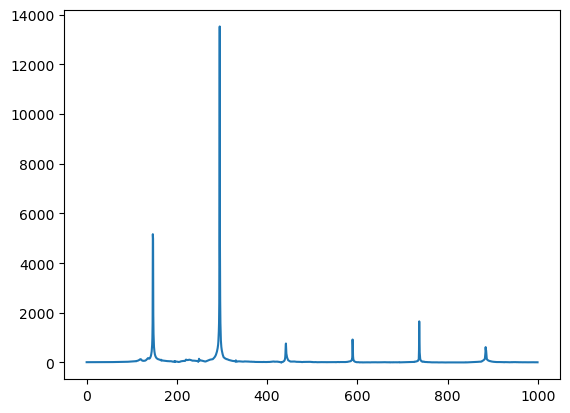

In [16]:
# Spektrum zeichnen
b.plot(1000)

In [26]:
# Peaks des Spektrums ermitteln
c=b.peaks()
c[:10]
# peaks liefert eine endlose list  von Tupeln (Intensität/ Frequenze) sortiert nach abnehmender Intensität

[(13518.307825659516, 294.9473757418398),
 (6774.200903974874, 294.43620178041544),
 (5160.66611668226, 146.7069269287834),
 (4973.042816746307, 147.21810089020772),
 (4690.905686491554, 295.4585497032641),
 (2488.1205288590854, 295.96972366468844),
 (2384.0473645609004, 293.9250278189911),
 (1922.0117369526522, 147.72927485163206),
 (1654.1409679624662, 737.1128523738872),
 (1598.4005212941813, 296.4808976261128)]

## 4. Im Spektrum enthaltene Töne erkennen

- Wandeln Sie die Liste der 10 stärksten Peaks in ein numpy-Array
- Erzeugen Sie eine `list` mit den Namen der Töne aus `notes`, deren Frequenzen in `peaks` enthalten sind 

>Hinweis: Da aufgrund der Stimmung des Instruments keine vollständige Übereinstimmung zu erwarten ist, müssen Sie mit Intervallen um die Nominalfrequenz arbeiten. Als absolute Toleranz bietet sich hierbei ein Wert von 0.5 Hz an



In [32]:
d=list(c)
d[:10]

[(13518.307825659516, 294.9473757418398),
 (6774.200903974874, 294.43620178041544),
 (5160.66611668226, 146.7069269287834),
 (4973.042816746307, 147.21810089020772),
 (4690.905686491554, 295.4585497032641),
 (2488.1205288590854, 295.96972366468844),
 (2384.0473645609004, 293.9250278189911),
 (1922.0117369526522, 147.72927485163206),
 (1654.1409679624662, 737.1128523738872),
 (1598.4005212941813, 296.4808976261128)]

In [39]:
# Ermitteln der 10 stärksten Peaks
top10peaks = np.array(sorted(d, reverse=True) [:10])
# Anzeigen
top10peaks
#b.peaks()[:10]
#top10peaks.shape

array([[13518.30782566,   294.94737574],
       [ 6774.20090397,   294.43620178],
       [ 5160.66611668,   146.70692693],
       [ 4973.04281675,   147.21810089],
       [ 4690.90568649,   295.4585497 ],
       [ 2488.12052886,   295.96972366],
       [ 2384.04736456,   293.92502782],
       [ 1922.01173695,   147.72927485],
       [ 1654.14096796,   737.11285237],
       [ 1598.40052129,   296.48089763]])

In [45]:
# Es ist deutlich erkennbar, dass 147 und 2* 147 enthalten sind
e=(np.abs(top10peaks[:,1] - 295) < 1).any()
e

True

In [43]:
np.isclose(top10peaks[:,1], 295, atol=1).any()

True

In [65]:
# Liste der enthaltenen Töne
tones=[]
for ton in notes:
    if np.isclose(top10peaks[:,1], notes[ton], atol=0.5).any():
        tones.append(ton)
tones

['D4', 'D3']

## 5. Zusammenfassen der Schritte zu einer function

- Schreiben Sie eine Funktion, die die obigen Schritte zusammenfasst. Eingangsdaten sind ein wave-Objekt und eine Liste von Referenzfrequenzen. Die Anzahl der zu berücksichtigen Frequenzen (default 10) und die absolute Toleranz (default 0.5) sollen als optionale Parameter einstellbar sein
- Wenden Sie die Funktion in einer Schleife auf die drei Wave-Dateien `G1.wav`, `G2.wav`, `G3.wav` und geben Sie die Ergebnisse übersichtlich aus

In [77]:
g1 = thinkdsp.read_wave('G1.wav')
g2 = thinkdsp.read_wave('G2.wav')
g3 = thinkdsp.read_wave('G3.wav')
def analyze_sound(sound, ref_freqs, nfreqs=10, tol=0.5):
    b = sound.make_spectrum()
    top10peaks = np.array(sorted(d, reverse=True) [:nfreqs])
    tones=[]
    for ton in ref_freqs:
        if np.isclose(top10peaks[:,1], ref_freqs[ton], atol=tol).any():
            tones.append(ton)
    return tones   

In [85]:
analyze_sound(g1, notes, 100, 0.5)

['A4', 'D4', 'D3']

In [89]:
for fname in ['G1.wav', 'G2.wav', 'G3.wav']:
    snd=thinkdsp.read_wave(fname)
    print(f'in {fname} ist {analyze_sound(snd, notes)} enthalten')

in G1.wav ist ['D4', 'D3'] enthalten
in G2.wav ist ['D4', 'D3'] enthalten
in G3.wav ist ['D4', 'D3'] enthalten


## 5. Erkennen von Mehrklängen (Akkorden)

- Wenden Sie die Function auf `Chord01.wav` an
- Mappen Sie die Liste der Töne bei den `Chords` auf `harmonics` und geben Sie die Akkordnamen aus (z.B. D-Dur)
>Hinweis: Sie werden die Toleranz anheben und die Anzahl der auszuwertenden Frequenzen erhöhen müssen (`nfreqs=20, tol=5.`)

Lösungshinweis: Löschen Sie die Oktavnummern (letzte Ziffer in z.B. C#4)  und bereinigen Sie die Liste, so dass jeder Ton nur noch einmal enthalten ist. Vergleichen Sie dann mit den Listen der Töne in `harmonics`. Sowohl für das Bereinigen als auch für das Mapping ist `set` der richtige Datentyp

In [91]:
snd = thinkdsp.read_wave('Chord01.wav)
snd.make_audio()
toene = analyze_sound(snd, notes, nfreqs=20, tol=2)
toene

SyntaxError: unterminated string literal (detected at line 1) (3844708708.py, line 1)

In [90]:
# Löschen der Ziffern und Umwandlung in set
toene = set([ton[:-1] for ton in toene])
toene

NameError: name 'toene' is not defined

In [ ]:
for chord in harmonics:
